In [28]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [15]:
#Creating the Data Frame
file_path = 'C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/labeledTrainData.tsv'
df = pd.read_csv(file_path, sep='\t')

print(df.head())

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


In [17]:
# Creating the Stemmed Data
#Apply Porter Stemmer
stemmer = PorterStemmer()

def apply_stemming(text):
    words = text.split()
    return ' '.join([stemmer.stem(word) for word in words])

df['review'] = df['review'].apply(apply_stemming)

In [20]:
# Split this into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [22]:
# Initialize the TF-IDF vectorizer with lowercase and optional stop words
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply (but do not fit) the TF-IDF vectorization to the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#You apply but do not fit the TF-IDF vectorizer to the test set to ensure consistency, prevent data leakage, and replicate a real-world scenario where you don't have access to the test data during training.

In [23]:
# Initialize and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression()

In [24]:
#Find the model accuracy on test set.
accuracy = logistic_regression.score(X_test_tfidf, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.42%


In [25]:
#Create a confusion matrix for the test set predictions
y_pred = logistic_regression.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2145  336]
 [ 243 2276]]


In [26]:
#Get the precision, recall, and F1-score for the test set predictions.
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.87
Recall: 0.90
F1-Score: 0.89


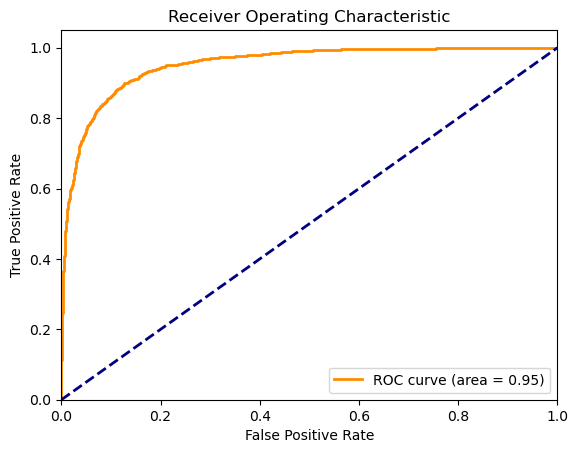

In [27]:
#Create a ROC curve for the test set.
# Get predicted probabilities for the positive class
y_probs = logistic_regression.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [29]:

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [31]:
#Train a logistic regression using the training data.
accuracy = random_forest.score(X_test_tfidf, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.42%


In [33]:
#Create a confusion matrix for the test set predictions
y_pred = random_forest.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2084  397]
 [ 382 2137]]


In [35]:
#Get the precision, recall, and F1-score for the test set predictions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.84
Recall: 0.85
F1-Score: 0.85


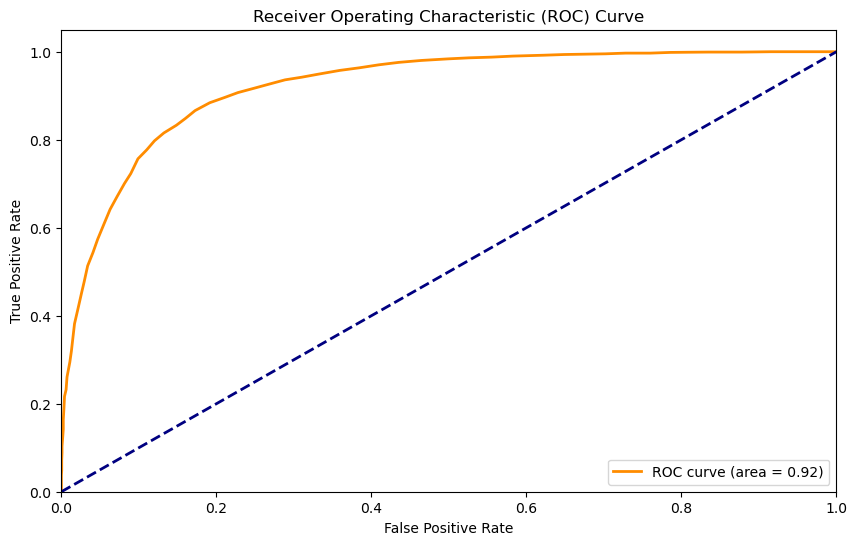

In [36]:
#Create a ROC curve for the test set.
# Get predicted probabilities for the positive class
y_probs = random_forest.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()